In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read in DataSet and clean nan inputs
starOrignialDF= pd.read_csv('pulsarStarData.csv',encoding = 'utf8')
starOrignialDF.dropna()
starOrignialDF.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
# Add Observation Number column and drop original index
starOrignialDF["OBS#"]= starOrignialDF.index + 1
obs = starOrignialDF["OBS#"]
starOrignialDF.drop(labels=["OBS#"], axis=1,inplace = True)
starOrignialDF.insert(0, "OBS#", obs)
starOrignialDF.head(5)

,OBS#,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,1,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,2,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,3,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,4,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,5,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
cleanDF = starOrignialDF


In [5]:
# Rename target column for prediction
cleanDF.rename(columns={'target_class': 'Pulsar_Star'}, inplace=True)


In [6]:
# cleanDF.rename(columns={"Mean of the integrated profil":'Mean_of_the_integrated_profile',
#                         'Standard deviation of the integrated profile' :'Standard_deviation_of_the_integrated_profile' ,
#                         'Excess kurtosis of the integrated profile':'Excess_kurtosis_of_the_integrated_profile' ,
#                         'Skewness of the integrated profile':'Skewness_of_the_integrated_profile' ,
#                         'Mean of the DM-SNR curve' : 'Mean_of_the_DM_SNR_curve',        
#                         'Standard deviation of the DM-SNR curve':'Standard_deviation_of_the_DM_SNR_curve',
#                         'Excess kurtosis of the DM-SNR curve' :'Excess_kurtosis_of_the_DM_SNR_curve',
#                         'Skewness of the DM-SNR curve':'Skewness_of_the_DM_SNR_curve',
#                           },inplace=True)

# cleanDF

In [7]:
# Assign the data to X and y

X =cleanDF[['Mean of the integrated profile','Pulsar_Star']]
y = cleanDF["OBS#"].values.reshape(-1, 1)
print(X.shape, y.shape)




(17898, 2) (17898, 1)


In [8]:
# import SKLearn for ML
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# Split the data to train then test
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Check the split
X_train.head()

,Mean of the integrated profile,Pulsar_Star
61,27.765625,1
3098,120.296875,0
12148,114.625000,0
5046,72.398438,1
16328,105.562500,0


In [10]:
# Scaling the data for optimal results
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

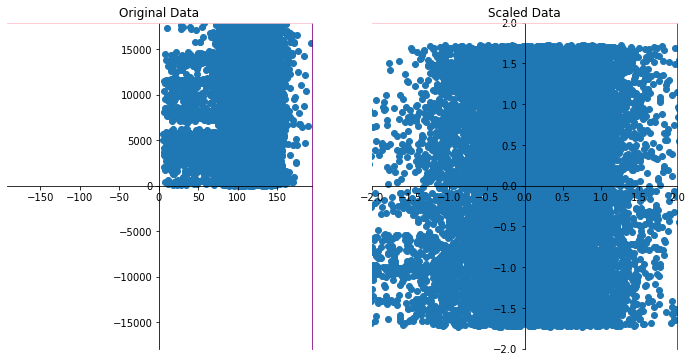

In [11]:
# Plot Results of Scaled Data
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train['Mean of the integrated profile'].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('purple')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('pink')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train['Mean of the integrated profile'], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])
plt.show()